In [29]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

INTERACTIVE_TABLES = False
USE_BLACK = True

# 100% width table
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

if INTERACTIVE_TABLES:
    from itables import init_notebook_mode

    init_notebook_mode(all_interactive=True, connected=True)

# black formatting
if USE_BLACK:
    %load_ext jupyter_black

# column/row limits removal
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# figsize is figsize
plt.rcParams["figure.figsize"] = (6, 8)
plt.rcParams["figure.dpi"] = 100

# CHANGEME
PATH_STR = "../data/artifacts/humaneval_raw.csv"

PATH = Path(PATH_STR)
assert PATH.exists()

/tmp/ipykernel_3818646/469945927.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [30]:
df = pd.read_csv(PATH)
df.head()

,index,pdf_fn,txt_fn,collection,annotator,rating,comments,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,6783,pdf/Annual_reports/Jahresabschluss_und_Lageber...,txt/Annual_reports/Jahresabschluss_und_Lageber...,Annual_reports,SH,5.0,tables are unreadable but that's too much to ask,NaN,Rating criteria:,NaN
1,10744,pdf/Annual_reports/Deutsche_Bank_Geschaeftsber...,txt/Annual_reports/Deutsche_Bank_Geschaeftsber...,Annual_reports,CH,NaN,NaN,NaN,1 (illegible),NaN
2,6396,pdf/Annual_reports/Deutsche_Bank_Geschaeftsber...,txt/Annual_reports/Deutsche_Bank_Geschaeftsber...,Annual_reports,NK,4.0,figures from tables e.g. -403 are �403,NaN,5 (perfect),NaN
3,9678,pdf/Annual_reports/2016-finanzstabilitaetsberi...,txt/Annual_reports/2016-finanzstabilitaetsberi...,Annual_reports,SH,4.0,"tables as usual, BUT 25%(!) of lines w/ hyphen...",NaN,Dataset:,http://serhii.net/corpus.zip
4,868,pdf/Annual_reports/Jahresabschluss_und_Lageber...,txt/Annual_reports/Jahresabschluss_und_Lageber...,Annual_reports,CH,NaN,NaN,NaN,NaN,NaN


In [31]:
column_names = [x for x in df.columns if "Unnam" not in x]
df = df[column_names]
df = df[~df.rating.isna()]
df.head()

,index,pdf_fn,txt_fn,collection,annotator,rating,comments
0,6783,pdf/Annual_reports/Jahresabschluss_und_Lageber...,txt/Annual_reports/Jahresabschluss_und_Lageber...,Annual_reports,SH,5.0,tables are unreadable but that's too much to ask
2,6396,pdf/Annual_reports/Deutsche_Bank_Geschaeftsber...,txt/Annual_reports/Deutsche_Bank_Geschaeftsber...,Annual_reports,NK,4.0,figures from tables e.g. -403 are �403
3,9678,pdf/Annual_reports/2016-finanzstabilitaetsberi...,txt/Annual_reports/2016-finanzstabilitaetsberi...,Annual_reports,SH,4.0,"tables as usual, BUT 25%(!) of lines w/ hyphen..."
5,4054,pdf/Annual_reports/dl_jb_2019.pdf,txt/Annual_reports/dl_jb_2019.pdf.txt,Annual_reports,NK,3.0,"some � instead whitespaces, sometimes first ri..."
6,5383,pdf/Annual_reports/2005-finanzstabilitaetsberi...,txt/Annual_reports/2005-finanzstabilitaetsberi...,Annual_reports,SH,2.0,Two columns that are totally mixed up in the e...


In [32]:
df

,index,pdf_fn,txt_fn,collection,annotator,rating,comments
0,6783,pdf/Annual_reports/Jahresabschluss_und_Lageber...,txt/Annual_reports/Jahresabschluss_und_Lageber...,Annual_reports,SH,5.0,tables are unreadable but that's too much to ask
2,6396,pdf/Annual_reports/Deutsche_Bank_Geschaeftsber...,txt/Annual_reports/Deutsche_Bank_Geschaeftsber...,Annual_reports,NK,4.0,figures from tables e.g. -403 are �403
3,9678,pdf/Annual_reports/2016-finanzstabilitaetsberi...,txt/Annual_reports/2016-finanzstabilitaetsberi...,Annual_reports,SH,4.0,"tables as usual, BUT 25%(!) of lines w/ hyphen..."
5,4054,pdf/Annual_reports/dl_jb_2019.pdf,txt/Annual_reports/dl_jb_2019.pdf.txt,Annual_reports,NK,3.0,"some � instead whitespaces, sometimes first ri..."
6,5383,pdf/Annual_reports/2005-finanzstabilitaetsberi...,txt/Annual_reports/2005-finanzstabilitaetsberi...,Annual_reports,SH,2.0,Two columns that are totally mixed up in the e...
8,8727,pdf/Annual_reports/Jahresabschluss_der_Deutsch...,txt/Annual_reports/Jahresabschluss_der_Deutsch...,Annual_reports,NK,5.0,"many tables with figures in pdfs, many sequenc..."
9,10658,pdf/Base_prospectuses/DekaBank_EPBSV-I-20_1105...,txt/Base_prospectuses/DekaBank_EPBSV-I-20_1105...,Base_prospectuses,SH,5.0,easy document no colums perfectly transcribed
11,11558,pdf/Base_prospectuses/nachtrag_vom_23_052017_8...,txt/Base_prospectuses/nachtrag_vom_23_052017_8...,Base_prospectuses,NK,4.0,a bit of mixture of texts in tables (interesti...
12,4163,pdf/Base_prospectuses/DWS TopPortfolioOffensiv...,txt/Base_prospectuses/DWS TopPortfolioOffensiv...,Base_prospectuses,SH,5.0,document with THREE columns that get neatly tr...
14,9512,pdf/Base_prospectuses/dip_2015_basisprospektzu...,txt/Base_prospectuses/dip_2015_basisprospektzu...,Base_prospectuses,NK,4.0,"quite good even with crazy table-structures, b..."


In [33]:
df.mean()

/tmp/ipykernel_3818646/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


index     6078.857143
rating       4.557143
dtype: float64

In [34]:
dstat = df.groupby("collection").mean()
dstat.reset_index()

,collection,index,rating
0,Annual_reports,6836.833333,3.833333
1,Base_prospectuses,7638.333333,4.666667
2,Final_terms,5103.333333,4.583333
3,IFRS,4012.000000,5.000000
4,Informational_materials,7583.833333,4.666667
5,Law,4954.333333,4.666667


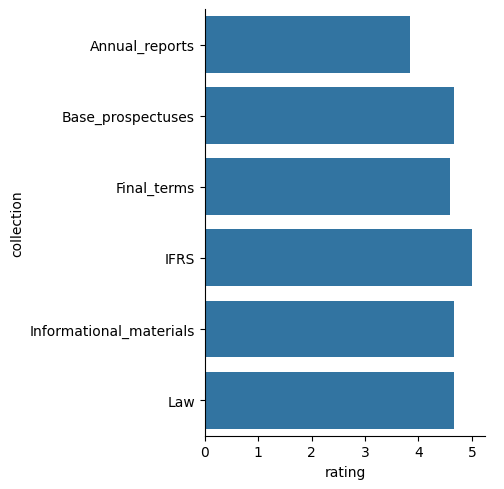

In [35]:
sns.catplot(dstat.reset_index(), y="collection", x="rating", kind="bar")

In [36]:
df.groupby("collection").agg(["mean", "count"])

/tmp/ipykernel_3818646/1640747271.py:1: FutureWarning: ['pdf_fn', 'txt_fn', 'annotator', 'comments'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("collection").agg(["mean", "count"])


index          rating      
                                mean count      mean count
collection                                                
Annual_reports           6836.833333     6  3.833333     6
Base_prospectuses        7638.333333     6  4.666667     6
Final_terms              5103.333333     6  4.583333     6
IFRS                     4012.000000     5  5.000000     5
Informational_materials  7583.833333     6  4.666667     6
Law                      4954.333333     6  4.666667     6

In [37]:
df.to_csv("../data/humaneval.csv", index=None)